In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [5]:
np.random.seed(42)
X,y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

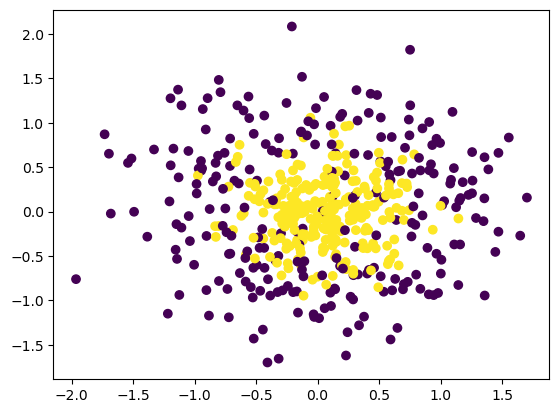

In [7]:
plt.scatter(X[:,0], X[:,1], c=y)

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,X,y, scoring='accuracy', cv=10))

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\DELL\an

0.786

In [13]:
abc.fit(X,y)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

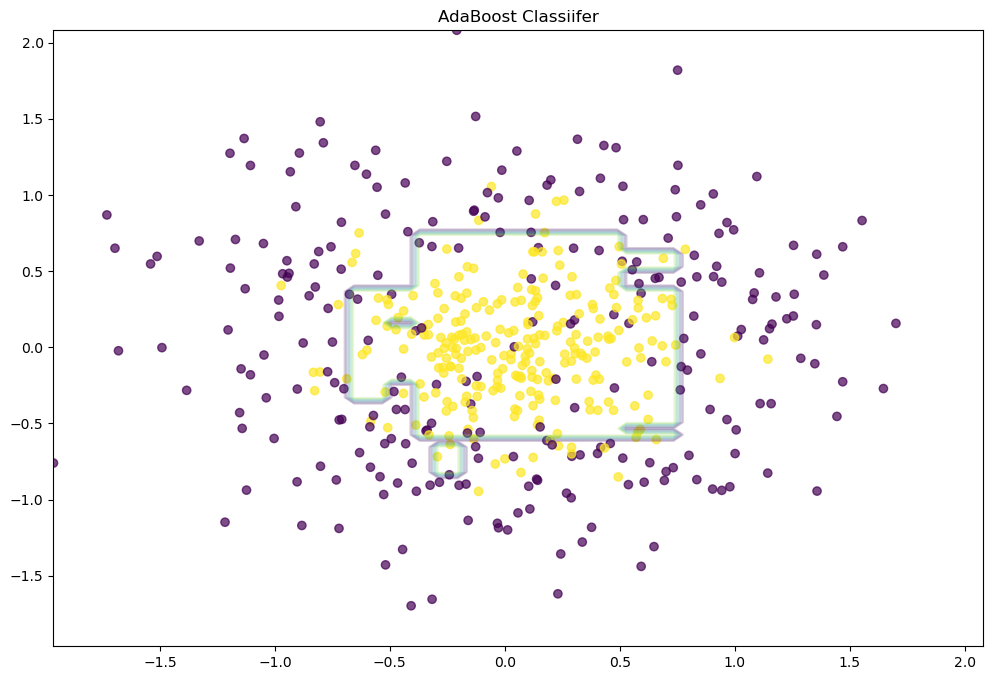

In [27]:
def plot_decision_boundry(clf):
    plt.figure(figsize=(12,8))
    X_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2  = np.meshgrid(X_range,X_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contour(xx1,xx2,y_hat,alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y,cmap='viridis', alpha=.7)
    plt.title("AdaBoost Classiifer")
    plt.show()
plot_decision_boundry(abc)



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


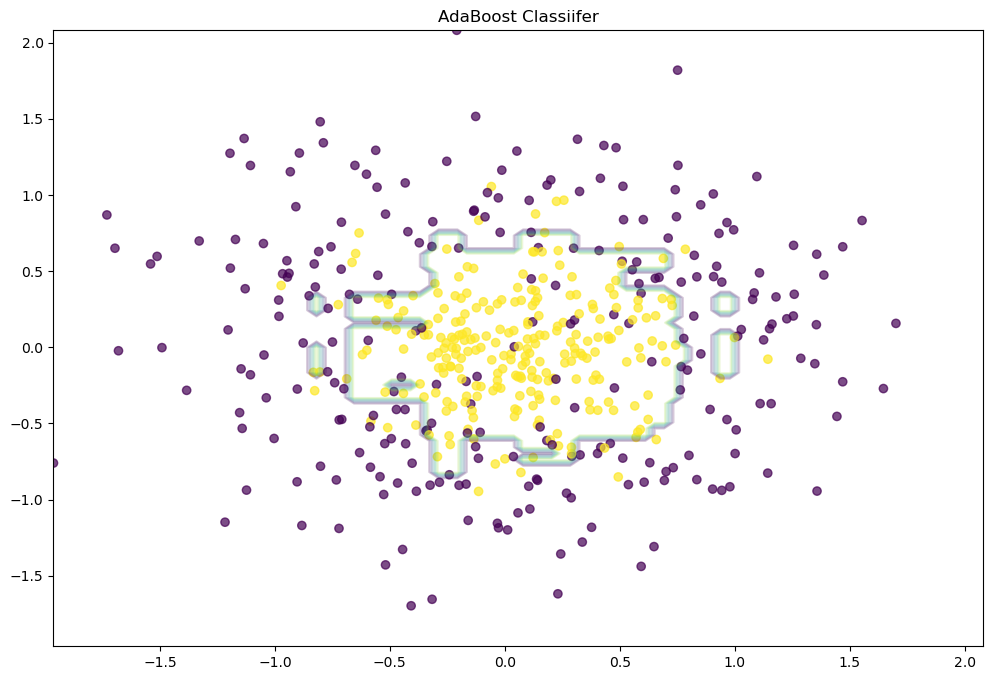

In [33]:
abc = AdaBoostClassifier(n_estimators=1500, learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundry(abc)

In [37]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10,50,100,500]
grid['learning_rate'] = [0.00001,0.0001,0.001,0.01,0.1,1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']

grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, scoring='accuracy', cv=10)

grid_result = grid_search.fit(X,y)

print('best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

AttributeError: 'GridSearchCV' object has no attribute 'best_params'